In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import cm

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Read the dataframe from the csv file
df = pd.read_csv('data.csv')

# Read the metadata from the csv file
dfc = pd.read_csv('metadata.csv')

# Get the metadata that has information about the IncomeGroup
dfc1 = dfc[~pd.isna(dfc['IncomeGroup'])]

# Select the columns of interest from the dataframe
df = df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
         '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
         '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
         '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

# Add a new column with the mean value of the selected years
df['mean'] = df[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
         '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
         '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].mean(axis=1)

# Indicators of Interest
selected_indicators = [
    'Population growth (annual %)',
    'CO2 emissions (metric tons per capita)',
    'CO2 emissions from gaseous fuel consumption (% of total)',
    'CO2 emissions from liquid fuel consumption (% of total)',
    'CO2 emissions from solid fuel consumption (% of total)',
    'Methane emissions (% change from 1990)',
    'Methane emissions (kt of CO2 equivalent)',
    'Nitrous oxide emissions (% change from 1990)',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
    'Other greenhouse gas emissions (% change from 1990)'
]

# Countries of Interest
countries = ['Ukraine', 'Mexico', 'Brazil', 'Canada', 'India',
             'United States', 'China', 'United Kingdom', 'France', 'Germany'
]

# Drop the columns that we do not need
df = df.drop(['Country Code','Indicator Code'], axis=1)


In [3]:
def data_ingestion(df, indicator):
    """
    This function ingests dataframe and an indicator to return dataframe
    transposed by countries and years.
    
    Parameters:
        df (DataFrame): Dataframe containing data.
        indicator (str): Indicator to be selected from dataframe.
        
    Returns:
        df1 (DataFrame): Dataframe transposed by countries.
        df2 (DataFrame): Dataframe transposed by years.
    """
    df1 = df[df['Indicator Name'] == indicator]
    df1 = df1.drop(['Indicator Name'], axis=1)
    df1.index = df1.loc[:, 'Country Name']
    df1 = df1.drop(['Country Name'], axis=1)
    df2 = df1.transpose()
    return df1, df2

df_year, df_country = data_ingestion(df, 'Population, total')


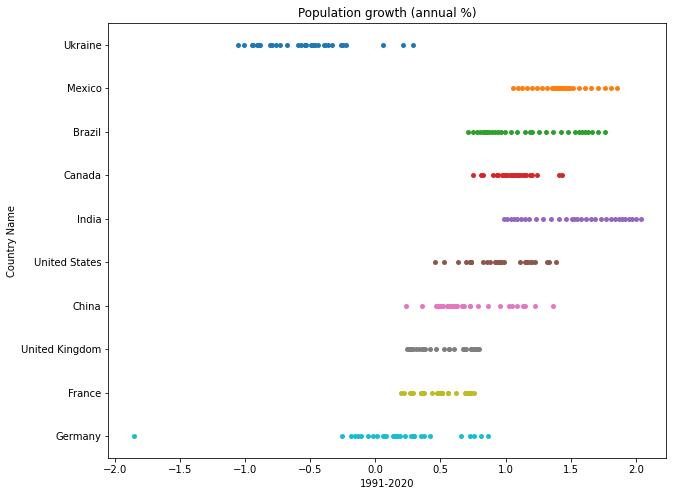

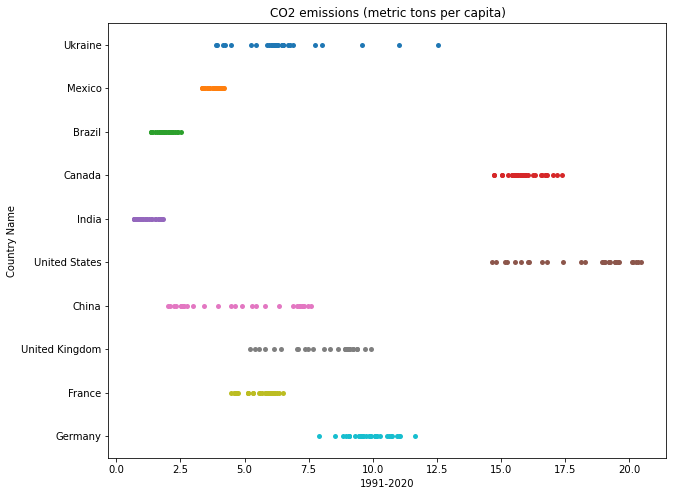

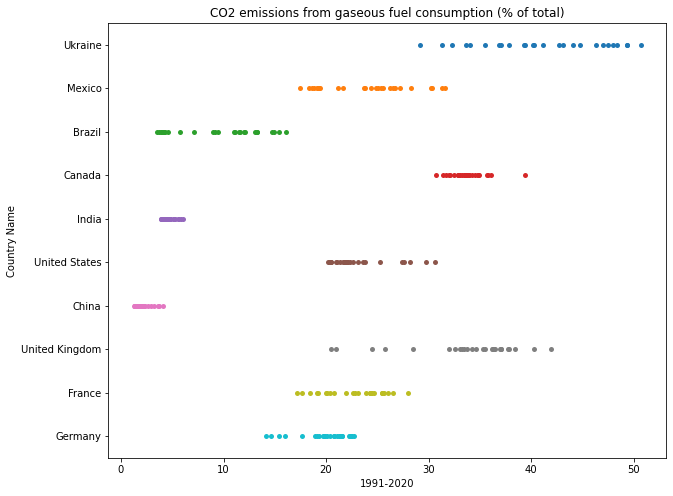

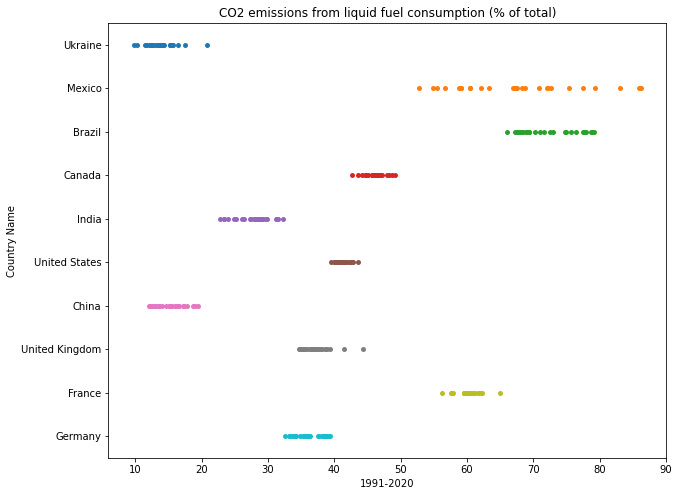

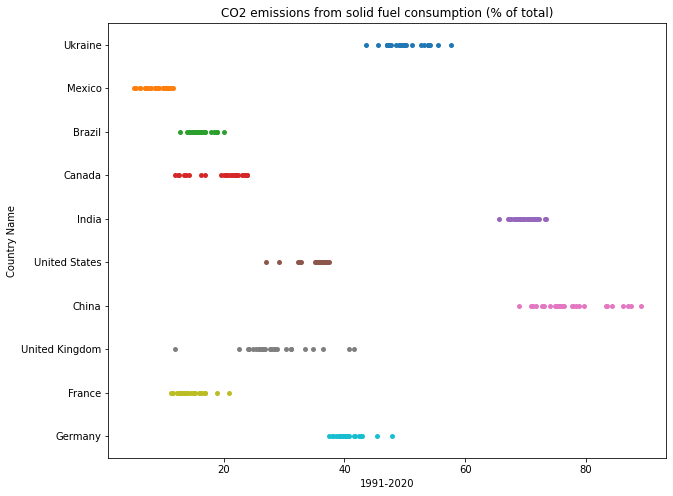

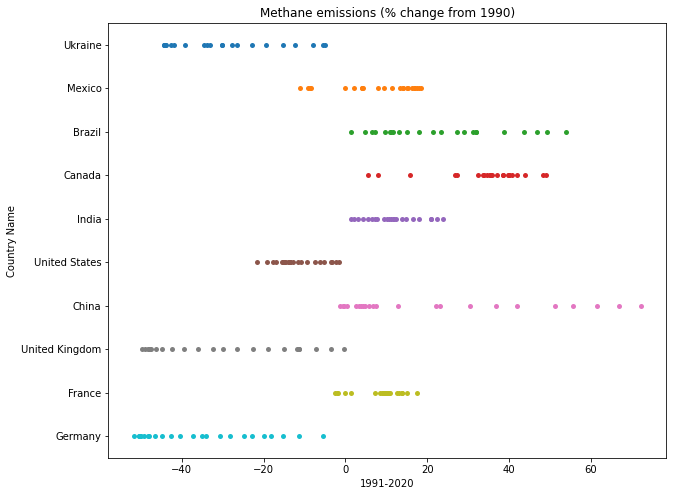

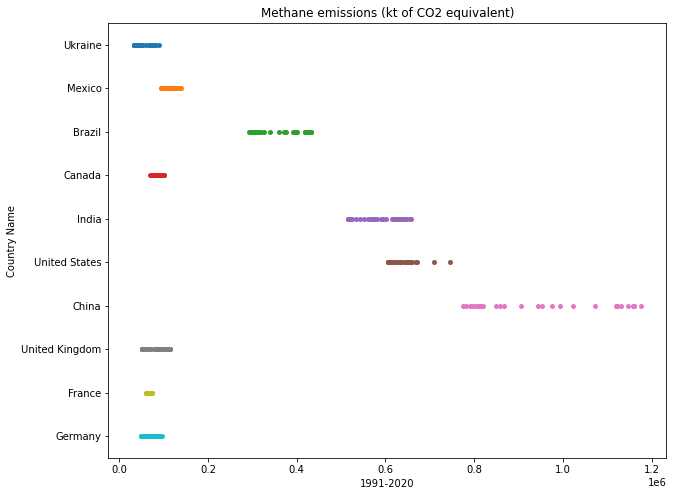

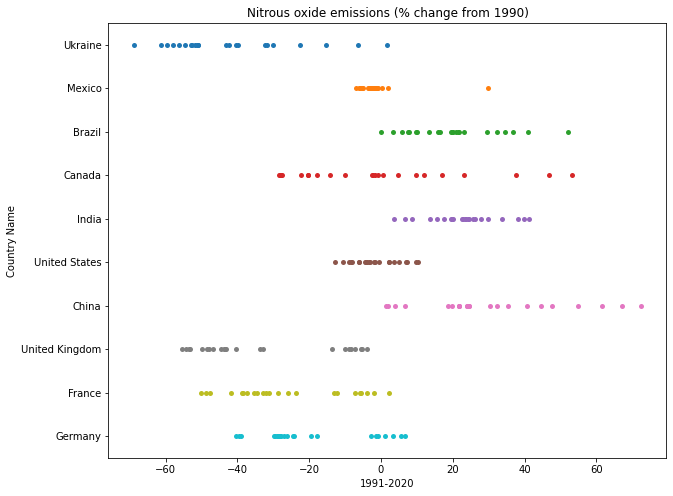

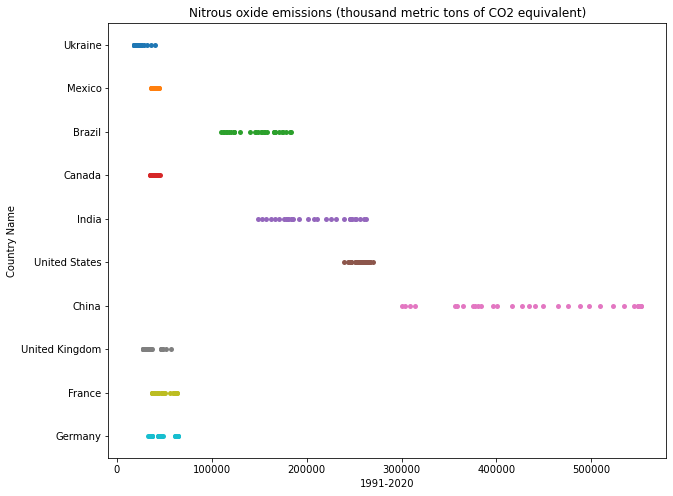

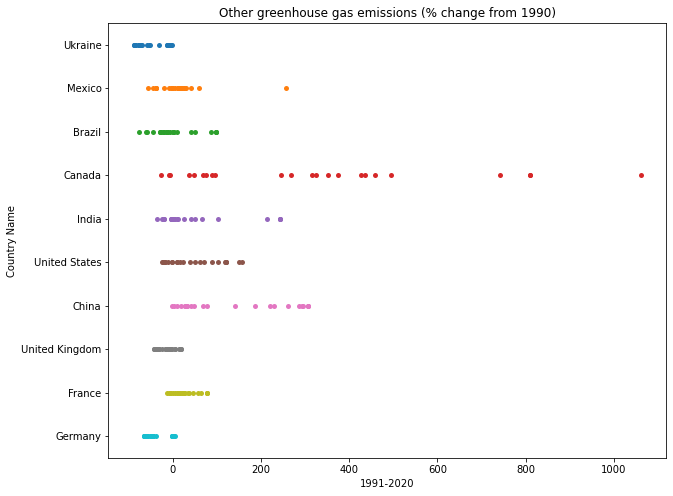

In [4]:
def swarm_plots(df, selected_indicators, countries):
    """
    This function plots a swarm plot for each selected indicator for a given list of countries.
    
    Parameters:
        df (DataFrame): Dataframe containing the indicators data.
        selected_indicators (list): List of indicators to plot.
        countries (list): List of countries to plot for.
    """
    for ind in selected_indicators:
        df_year, df_country = data_ingestion(df, ind)
        plt.figure(figsize=(10, 8))
        for i in df_year.columns:
            sns.swarmplot(y='Country Name', x=i, data=df_year.loc[countries, :].reset_index())

        plt.title(ind)
        plt.xlabel('1991-2020')
        plt.show()

swarm_plots(df, selected_indicators, countries)


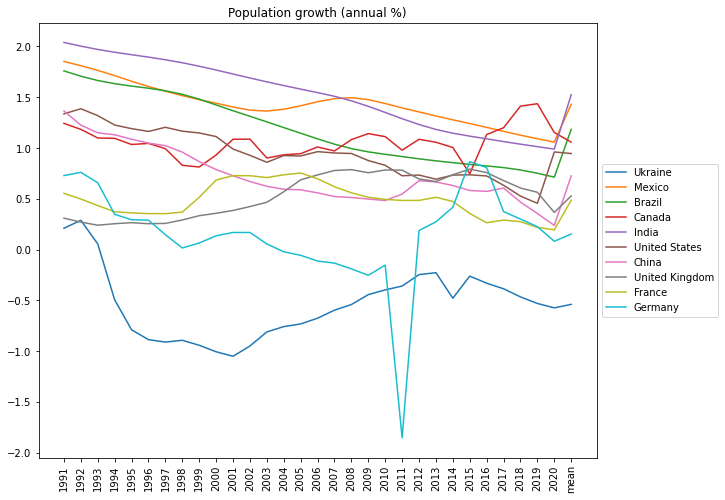

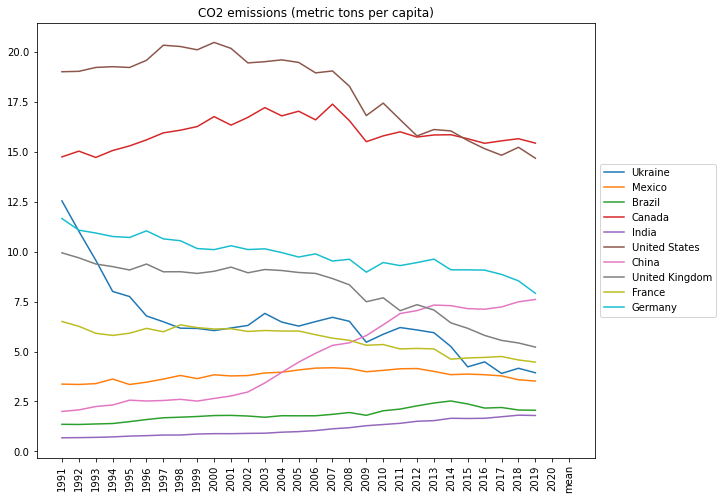

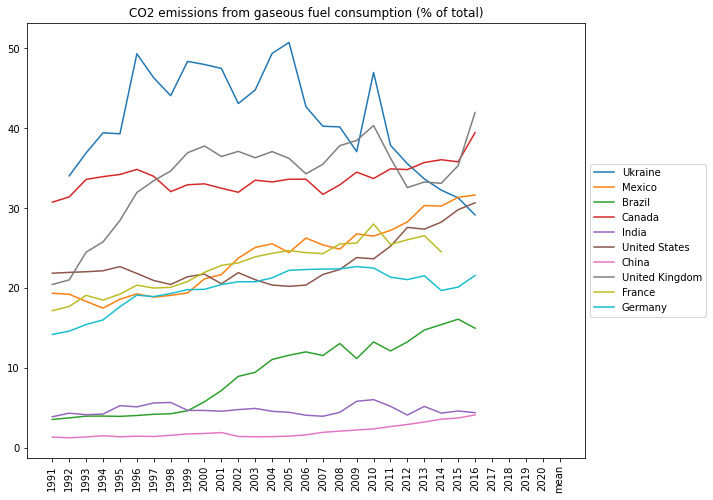

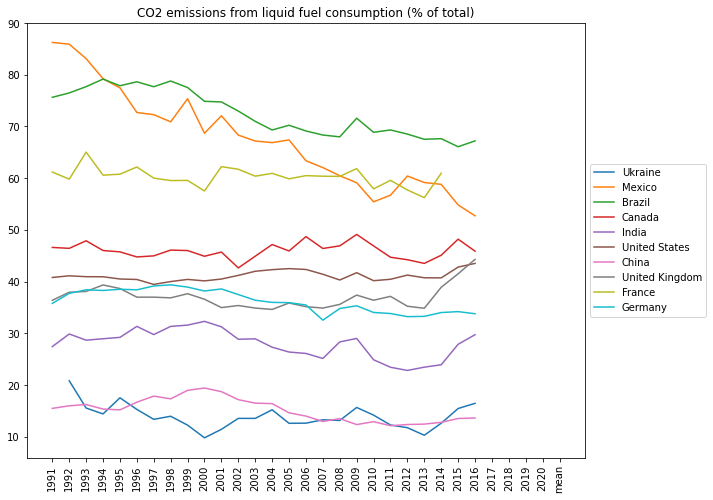

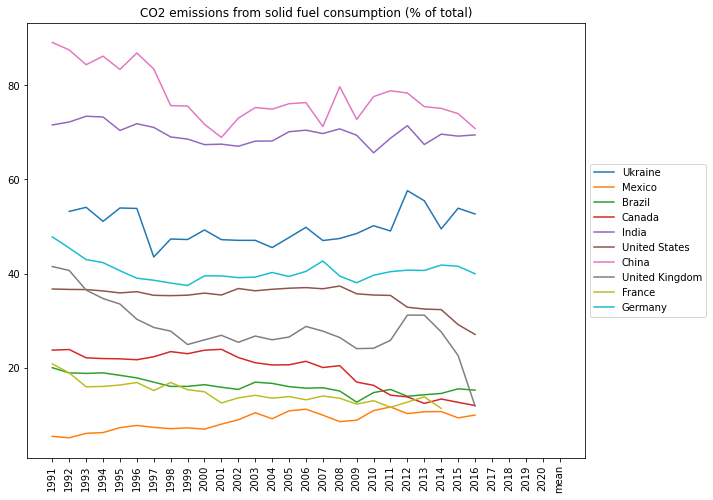

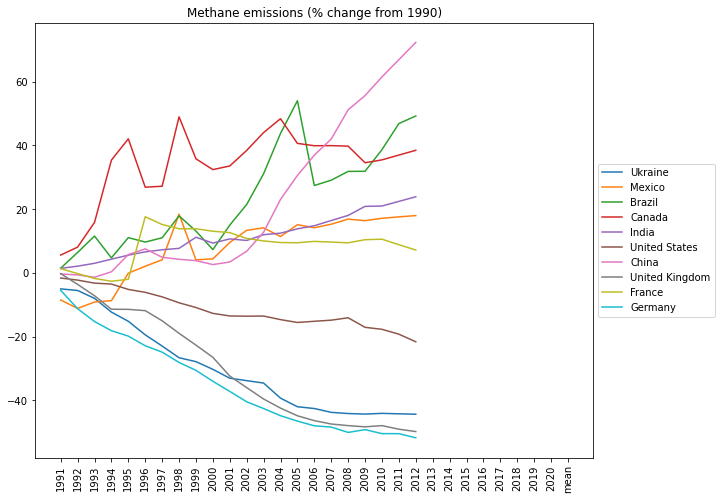

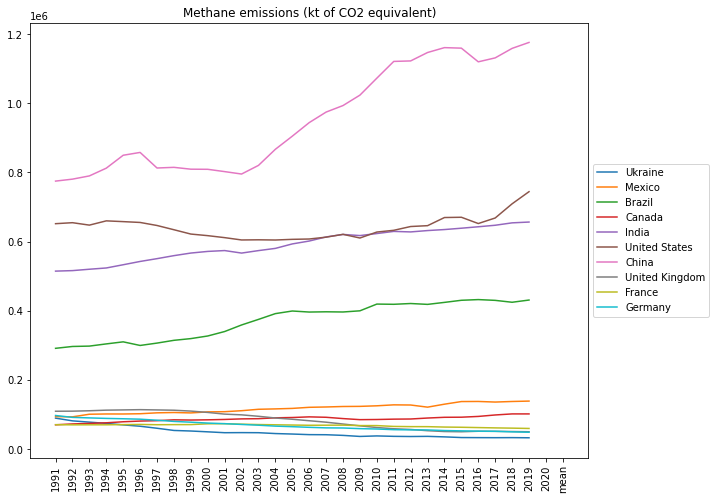

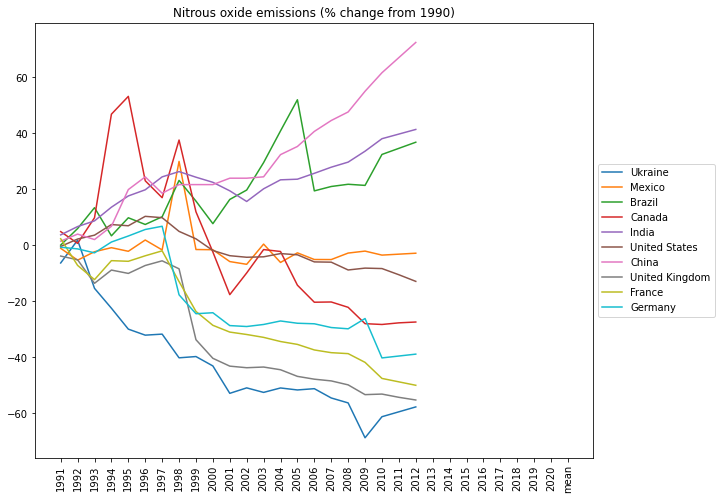

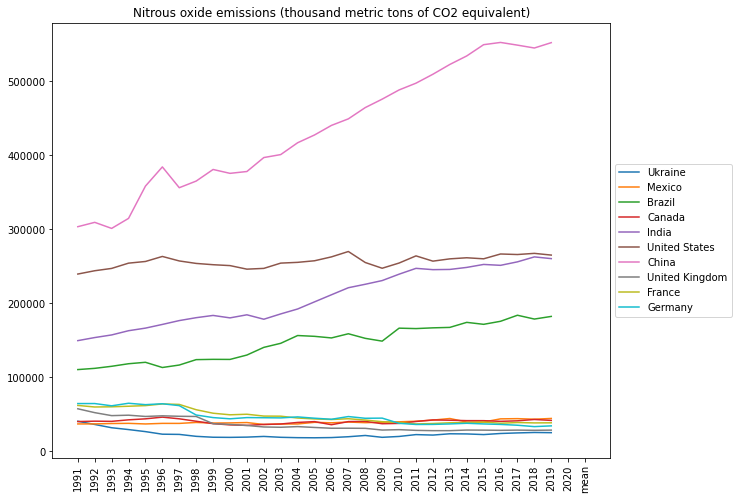

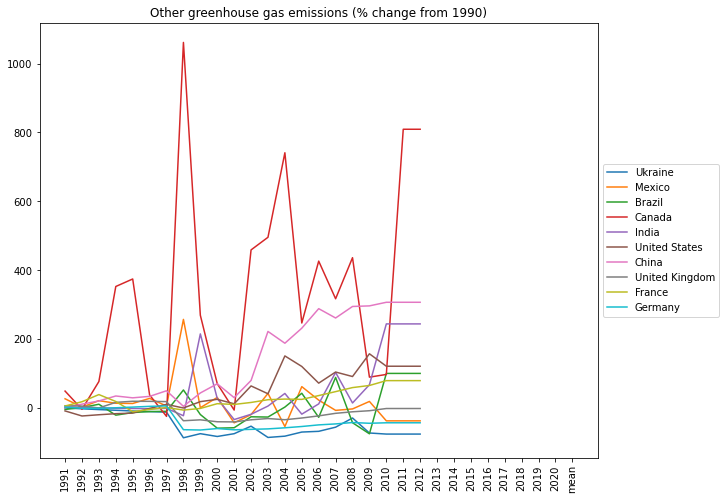

In [5]:
def plot_indicators(df, selected_indicators, countries):
    """
    Plots the selected indicators for the given countries over time.
    
    Parameters:
        df (DataFrame): Dataframe containing indicators data.
        selected_indicators (list): List of indicators to plot.
        countries (list): List of countries to plot indicators for.
    """
    for ind in selected_indicators:
        df_year, df_country = data_ingestion(df, ind)
        plt.figure(figsize=(10, 8))
        for i in countries:
            plt.plot(df_country[i], label=i)
        plt.title(ind)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=90)
        plt.show()

plot_indicators(df, selected_indicators, countries)


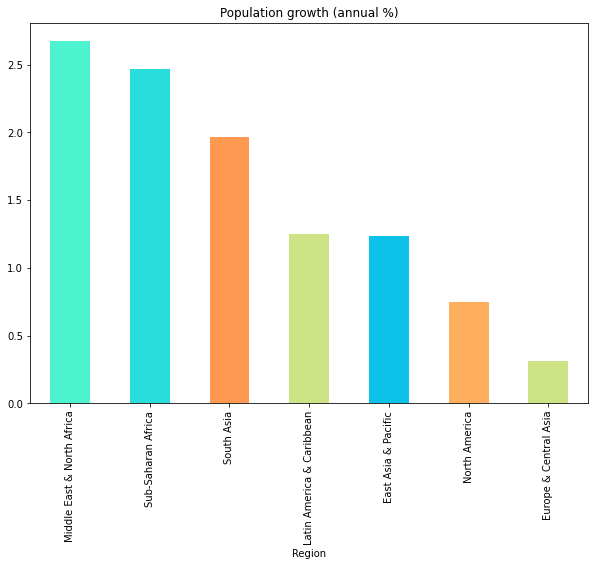

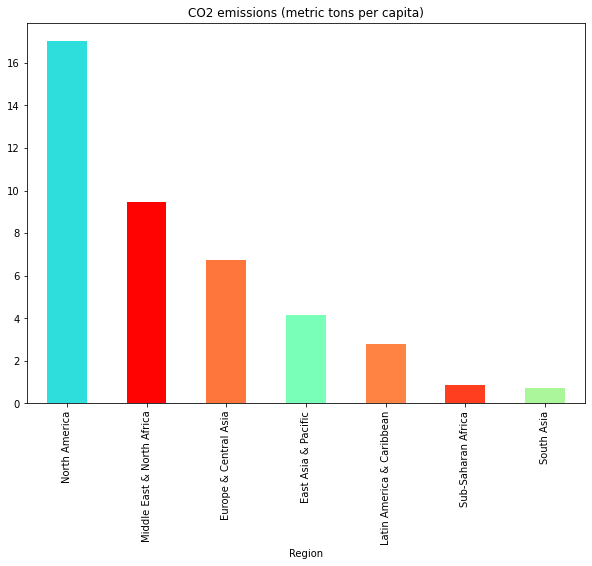

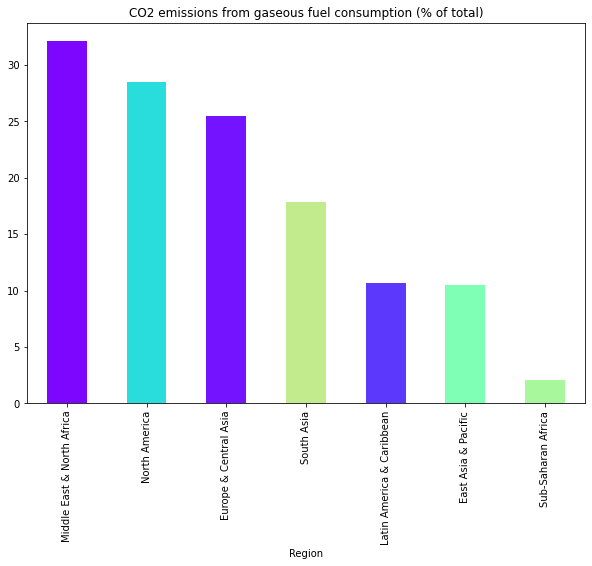

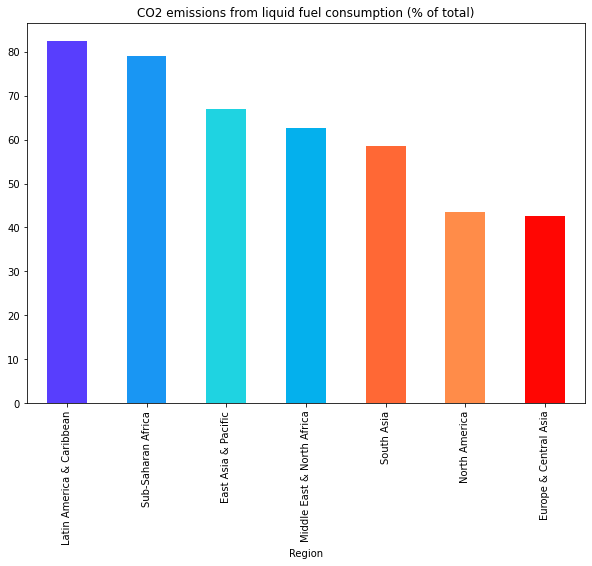

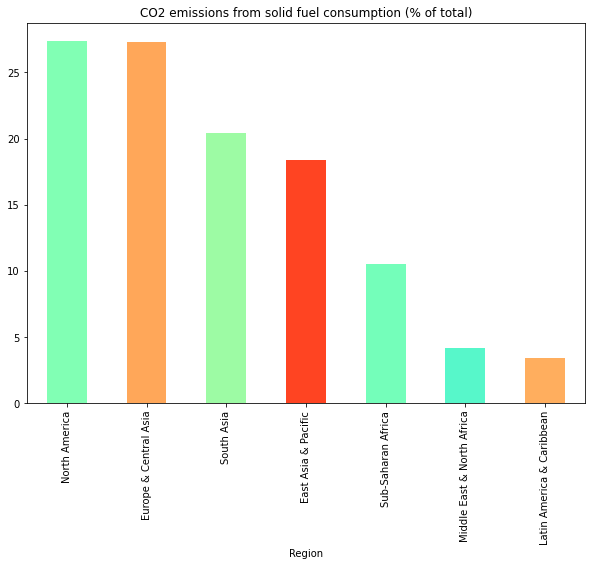

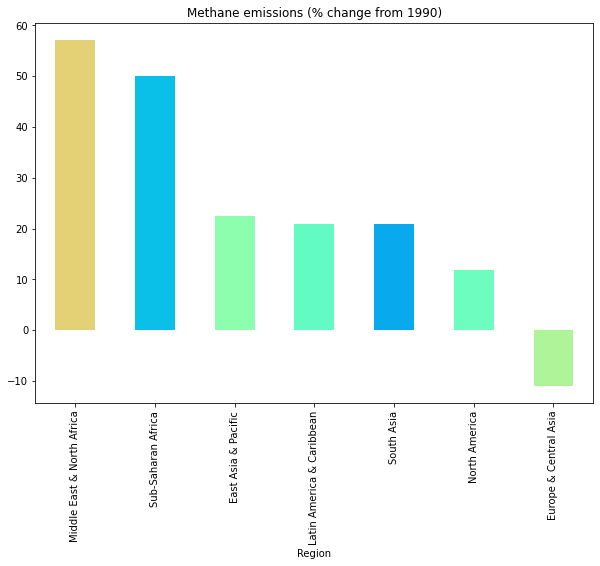

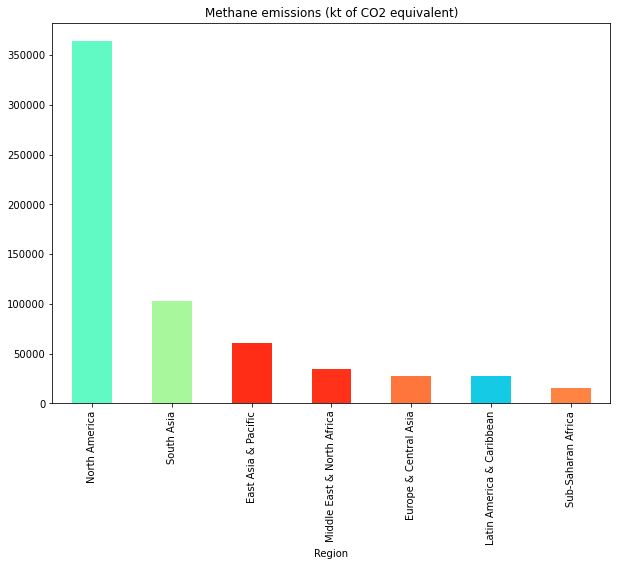

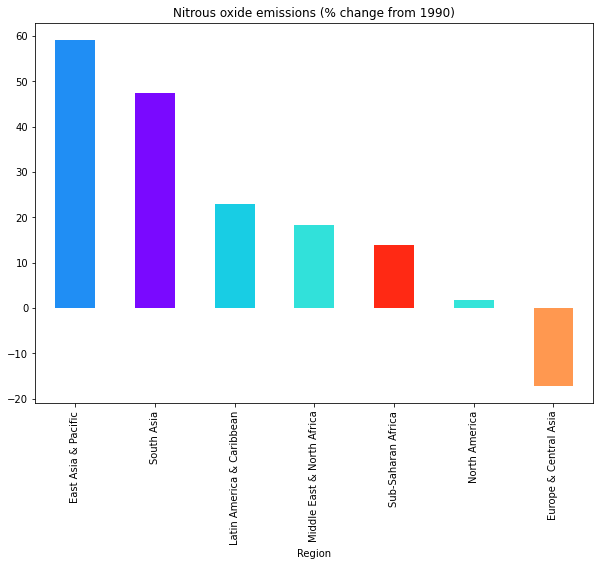

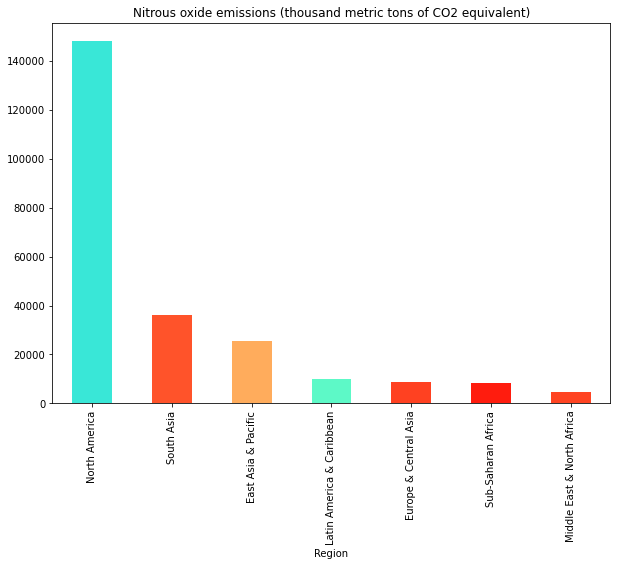

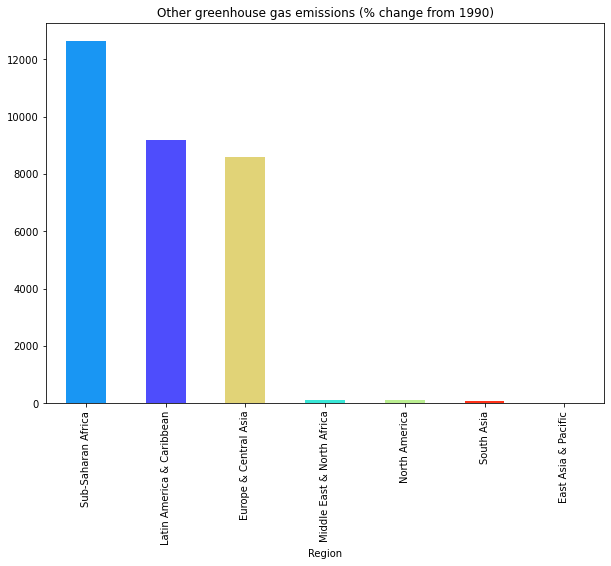

In [6]:

def plot_mean_by_region(df, dfc, indicators):
    """
    Plot the mean of selected indicators by region.
    
    Parameters:
        df (DataFrame): Dataframe containing indicator data.
        dfc (DataFrame): Dataframe containing country metadata.
        indicators (list): List of indicators to plot mean for.
    """
    for i in indicators:
        plt.figure(figsize=(10,7))
        temp_df = df[df['Indicator Name'] == i]
        temp_df = temp_df.merge(dfc, left_on='Country Name', right_on='TableName')
        colors = [cm.rainbow(random.random()) for i in range(len(temp_df.Region.unique()))]
        temp_df.groupby(['Region'])['mean'].mean().sort_values(ascending=False).plot(kind='bar', color=colors)
        plt.title(i)
        plt.show()

plot_mean_by_region(df, dfc1, selected_indicators)


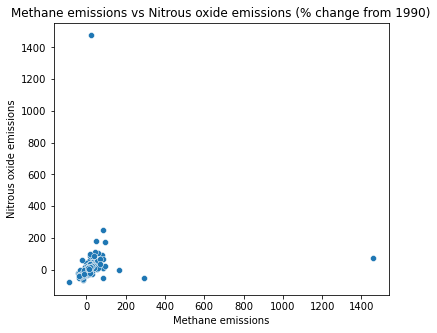

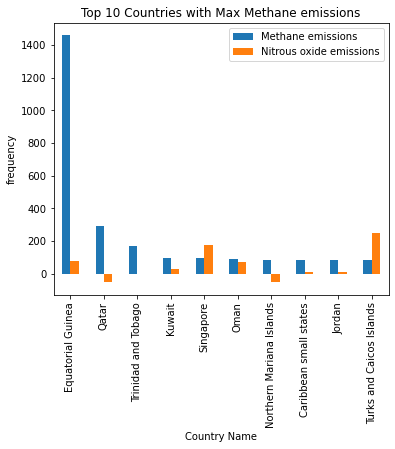

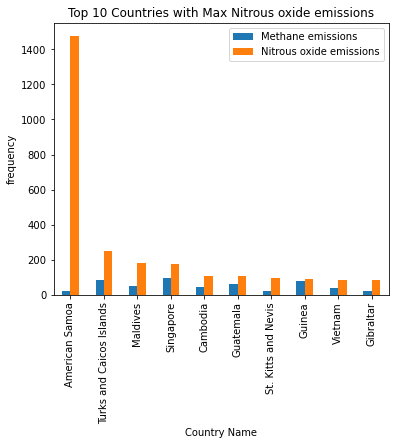

In [7]:

def graph_methane_vs_nitrous_oxide_emissions(df):
    """
    Graphs Methane emissions and Nitrous oxide emissions (% change from 1990) on a scatter plot
    Graphs top 10 countries with max Methane emissions and Nitrous oxide emissions (% change from 1990)
    
    Parameters:
        df (DataFrame): Dataframe containing data.
    """
    df1, df2 = data_ingestion(df, 'Methane emissions (% change from 1990)')
    df3, df4 = data_ingestion(df, 'Nitrous oxide emissions (% change from 1990)')
    
    df1_mean = df1.mean(axis=1).reset_index().rename({0:'Methane emissions'}, axis=1)
    df3_mean = df3.mean(axis=1).reset_index().rename({0:'Nitrous oxide emissions'}, axis=1)
    
    n_df = df1_mean.merge(df3_mean, on='Country Name')
    
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=n_df['Methane emissions'], y=n_df['Nitrous oxide emissions'])
    plt.xlabel('Methane emissions')
    plt.ylabel('Nitrous oxide emissions')
    plt.title('Methane emissions vs Nitrous oxide emissions (% change from 1990)')
    plt.show()
    
    n_df.index = n_df.loc[:, 'Country Name']
    n_df.sort_values(by='Methane emissions', ascending=False)[:10].plot(kind='bar',figsize=(6,5))
    plt.ylabel('frequency')
    plt.title('Top 10 Countries with Max Methane emissions')
    plt.show()
    
    n_df.sort_values(by='Nitrous oxide emissions', ascending=False)[:10].plot(kind='bar',figsize=(6,5))
    plt.ylabel('frequency')
    plt.title('Top 10 Countries with Max Nitrous oxide emissions')
    plt.show()


graph_methane_vs_nitrous_oxide_emissions(df)

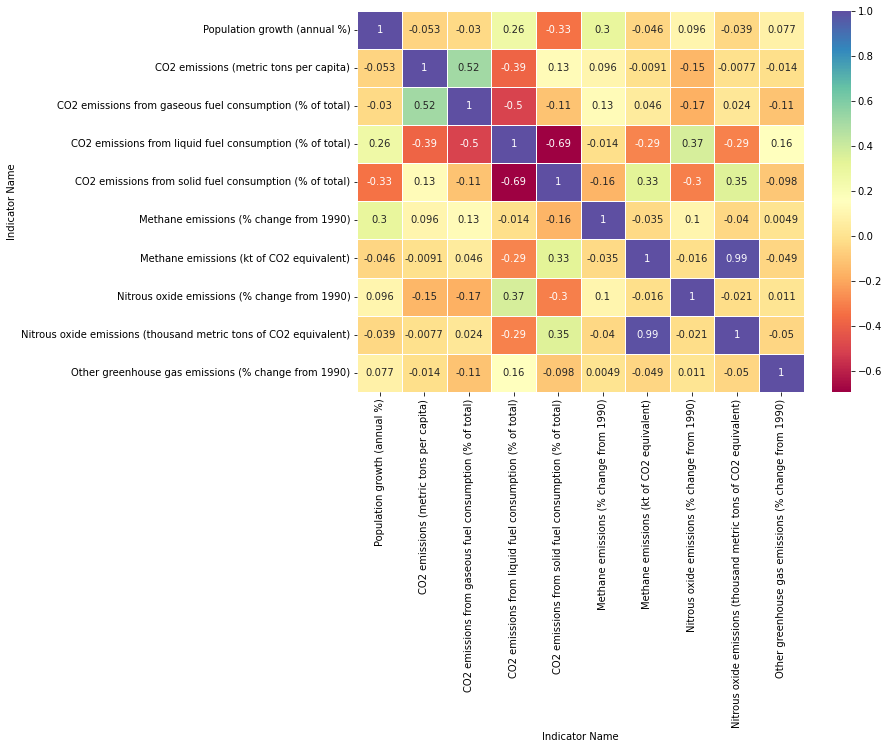

In [8]:

def correlation_heatmap(df, selected_indicators):
    """
    Plots a heatmap of the correlation between selected indicators in the dataframe.
    
    Parameters:
        df (DataFrame): Dataframe containing the indicators.
        selected_indicators (str): List of selected indicators to be plotted in the heatmap.
    """
    df1 = df.groupby(['Country Name','Indicator Name'])['mean'].mean().unstack()
    plt.figure(figsize=(10,7))
    sns.heatmap(df1[selected_indicators].corr(), cmap='Spectral', linewidths=.5, annot=True)
    
correlation_heatmap(df, selected_indicators)



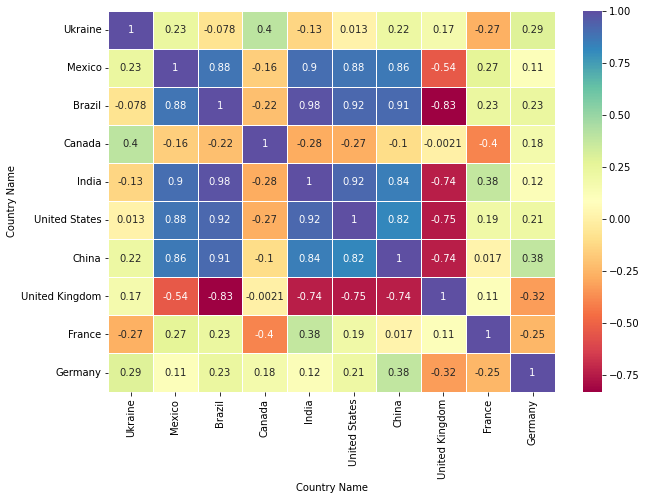

In [9]:
def population_growth_correlation(df, countries):
    """
    Plots a heatmap of the correlation between selected countries for the population growth indicator.
    
    Parameters:
        df (DataFrame): Dataframe containing the population growth indicator.
        countries (list): List of countries to be used in the heatmap.
    """
    df_year, df_country = data_ingestion(df, 'Population growth (annual %)')
    plt.figure(figsize=(10,7))
    sns.heatmap(df_country[countries].corr(), cmap='Spectral', linewidths=.5, annot=True)
    
population_growth_correlation(df, countries)
